In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
main = pd.read_csv('churn.csv')
df = main.copy()

In [178]:
df.head()

churn  accountlength internationalplan voicemailplan  numbervmailmessages  \
0    No            128                no           yes                   25   
1    No            107                no           yes                   26   
2    No            137                no            no                    0   
3    No             84               yes            no                    0   
4    No             75               yes            no                    0   

   totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes  \
0            265.1            110           45.07            197.4   
1            161.6            123           27.47            195.5   
2            243.4            114           41.38            121.2   
3            299.4             71           50.90             61.9   
4            166.7            113           28.34            148.3   

   totalevecalls  totalevecharge  totalnightminutes  totalnightcalls  \
0             99           16.78              244.7               91   
1            103           16.62              254.4              103   
2            110           10.30              162.6              104   
3             88            5.26              196.9               89   
4            122           12.61              186.9              121   

   totalnightcharge  totalintlminutes  totalintlcalls  totalintlcharge  \
0             11.01              10.0               3             2.70   
1             11.45              13.7               3             3.70   
2              7.32              12.2               5             3.29   
3              8.86               6.6               7             1.78   
4              8.41              10.1               3             2.73   

   numbercustomerservicecalls  
0                           1  
1                           1  
2                           0  
3                           2  
4                           3

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [180]:
df.isna().sum()

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [181]:
df.duplicated().sum()

0

In [182]:
for column in df.columns:
    print(column, len(df[column].unique()))

churn 2
accountlength 218
internationalplan 2
voicemailplan 2
numbervmailmessages 48
totaldayminutes 1961
totaldaycalls 123
totaldaycharge 1961
totaleveminutes 1879
totalevecalls 126
totalevecharge 1659
totalnightminutes 1853
totalnightcalls 131
totalnightcharge 1028
totalintlminutes 170
totalintlcalls 21
totalintlcharge 170
numbercustomerservicecalls 10


In [183]:
cats=[]
quants=[]
for column in df.columns:
    if df[column].dtype=='object':
        cats.append(column)
    else:
        quants.append(column)
        

In [184]:
cats
quants

['accountlength',
 'numbervmailmessages',
 'totaldayminutes',
 'totaldaycalls',
 'totaldaycharge',
 'totaleveminutes',
 'totalevecalls',
 'totalevecharge',
 'totalnightminutes',
 'totalnightcalls',
 'totalnightcharge',
 'totalintlminutes',
 'totalintlcalls',
 'totalintlcharge',
 'numbercustomerservicecalls']

In [185]:
df.describe()

accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count     5000.00000          5000.000000      5000.000000    5000.000000   
mean       100.25860             7.755200       180.288900     100.029400   
std         39.69456            13.546393        53.894699      19.831197   
min          1.00000             0.000000         0.000000       0.000000   
25%         73.00000             0.000000       143.700000      87.000000   
50%        100.00000             0.000000       180.100000     100.000000   
75%        127.00000            17.000000       216.200000     113.000000   
max        243.00000            52.000000       351.500000     165.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     5000.000000      5000.000000    5000.000000     5000.000000   
mean        30.649668       200.636560     100.191000       17.054322   
std          9.162069        50.551309      19.826496        4.296843   
min          0.000000         0.000000       0.000000        0.000000   
25%         24.430000       166.375000      87.000000       14.140000   
50%         30.620000       201.000000     100.000000       17.090000   
75%         36.750000       234.100000     114.000000       19.900000   
max         59.760000       363.700000     170.000000       30.910000   

       totalnightminutes  totalnightcalls  totalnightcharge  totalintlminutes  \
count        5000.000000      5000.000000       5000.000000       5000.000000   
mean          200.391620        99.919200          9.017732         10.261780   
std            50.527789        19.958686          2.273763          2.761396   
min             0.000000         0.000000          0.000000          0.000000   
25%           166.900000        87.000000          7.510000          8.500000   
50%           200.400000       100.000000          9.020000         10.300000   
75%           234.700000       113.000000         10.560000         12.000000   
max           395.000000       175.000000         17.770000         20.000000   

       totalintlcalls  totalintlcharge  numbercustomerservicecalls  
count     5000.000000      5000.000000                 5000.000000  
mean         4.435200         2.771196                    1.570400  
std          2.456788         0.745514                    1.306363  
min          0.000000         0.000000                    0.000000  
25%          3.000000         2.300000                    1.000000  
50%          4.000000         2.780000                    1.000000  
75%          6.000000         3.240000                    2.000000  
max         20.000000         5.400000                    9.000000

In [186]:
df.describe(include='object')

churn internationalplan voicemailplan
count   5000              5000          5000
unique     2                 2             2
top       No                no            no
freq    4293              4527          3677

In [187]:
for quant in quants:
    print(quant, len(df[quant].unique()), df[quant].unique())
    print("......................................................")

accountlength 218 [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221 187  14 238 216
 222 233]
......................................................
numbervmailmessages 48 [25 26  0 24 37 27

In [188]:
for quant in quants:
    print(quant,sum(df[quant]<0))

accountlength 0
numbervmailmessages 0
totaldayminutes 0
totaldaycalls 0
totaldaycharge 0
totaleveminutes 0
totalevecalls 0
totalevecharge 0
totalnightminutes 0
totalnightcalls 0
totalnightcharge 0
totalintlminutes 0
totalintlcalls 0
totalintlcharge 0
numbercustomerservicecalls 0


In [189]:
df['churn']=np.where(df['churn']=="No",0,1)

In [190]:
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churn, Length: 5000, dtype: int32

In [191]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df,stratify=df['churn'],test_size=0.2,random_state=100)

# Data Visualisation

([<matplotlib.patches.Wedge at 0x2063874bc10>,
 [Text(-0.4730422778918275, -0.9930916389371683, '0'),
  Text(0.5590499647812508, 1.1736537551075625, '1')],
 [Text(-0.2580230606682695, -0.5416863485111827, '85.9%'),
  Text(0.3440307475576928, 0.722248464681577, '14.1%')])

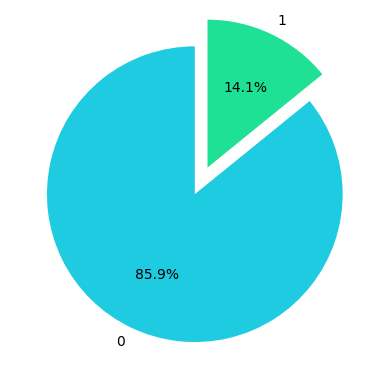

In [221]:
frequency = df_train['churn'].value_counts()

fig, ax = plt.subplots()
ax.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=90, explode=(0,0.2), colors=["#1ECBE1","#1EE196"])

<Figure size 800x800 with 0 Axes>

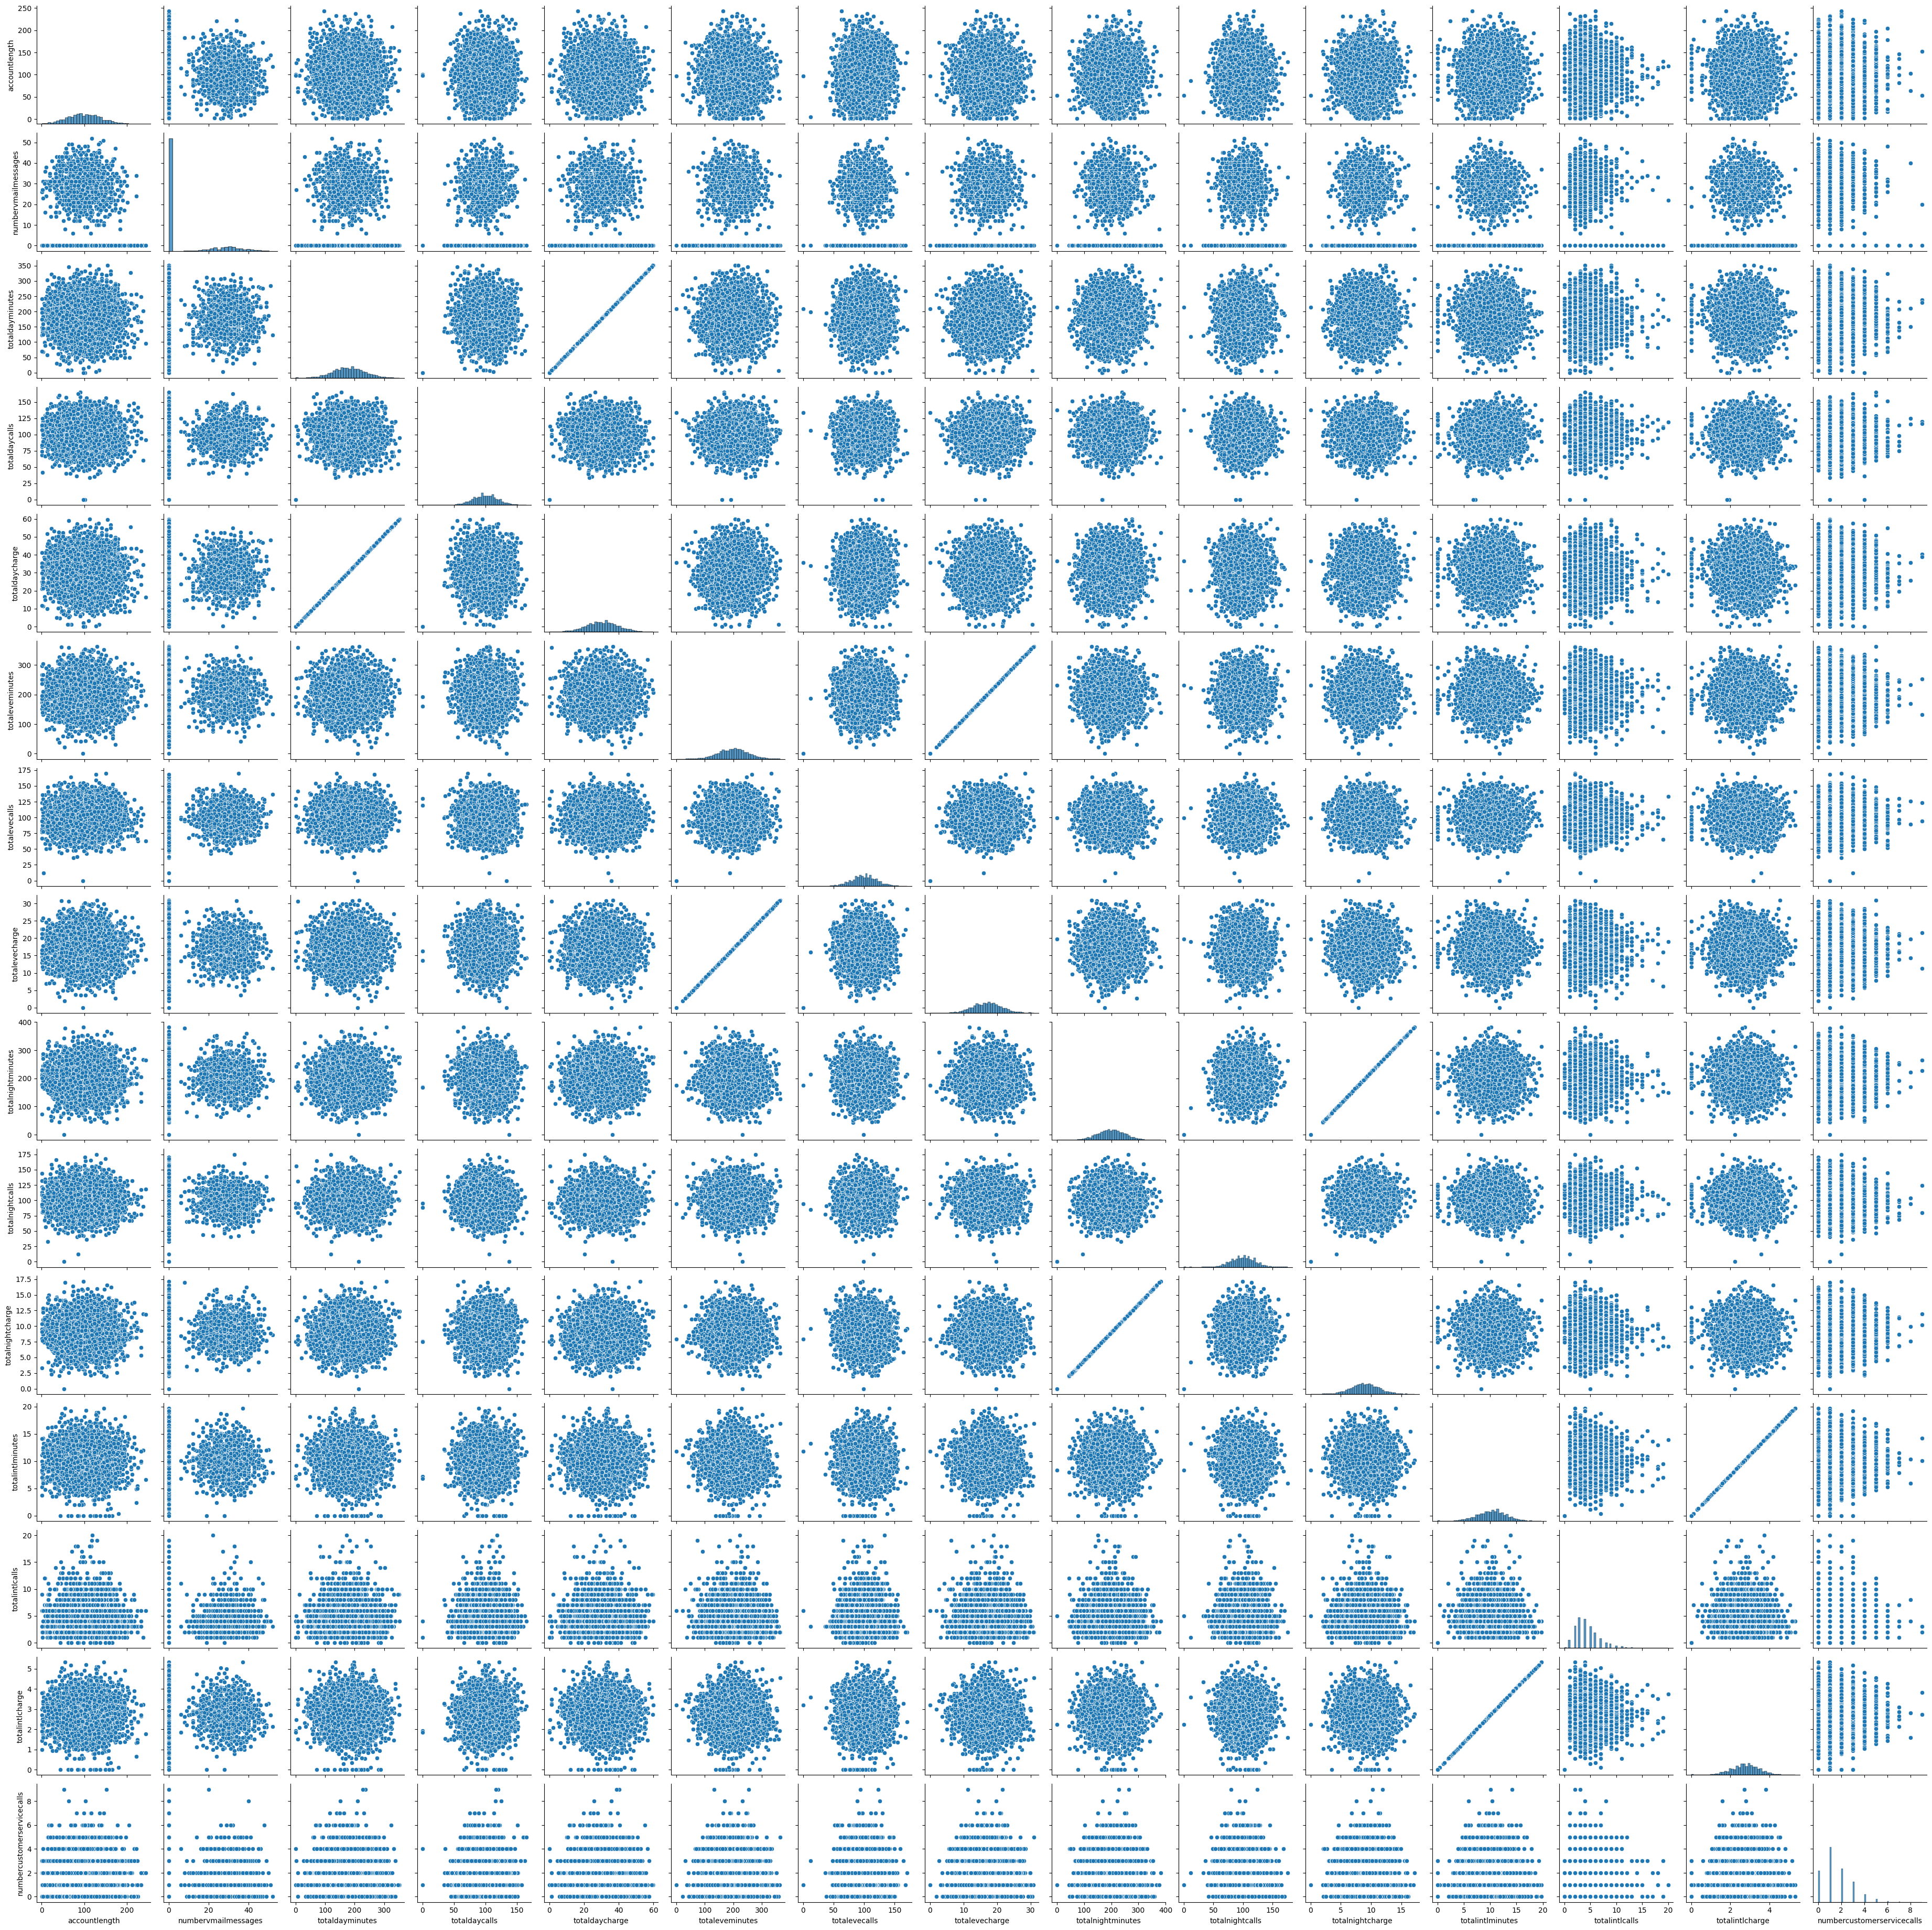

In [223]:
plt.figure(figsize=(8,8))
sns.pairplot(df_train.loc[:,quants])

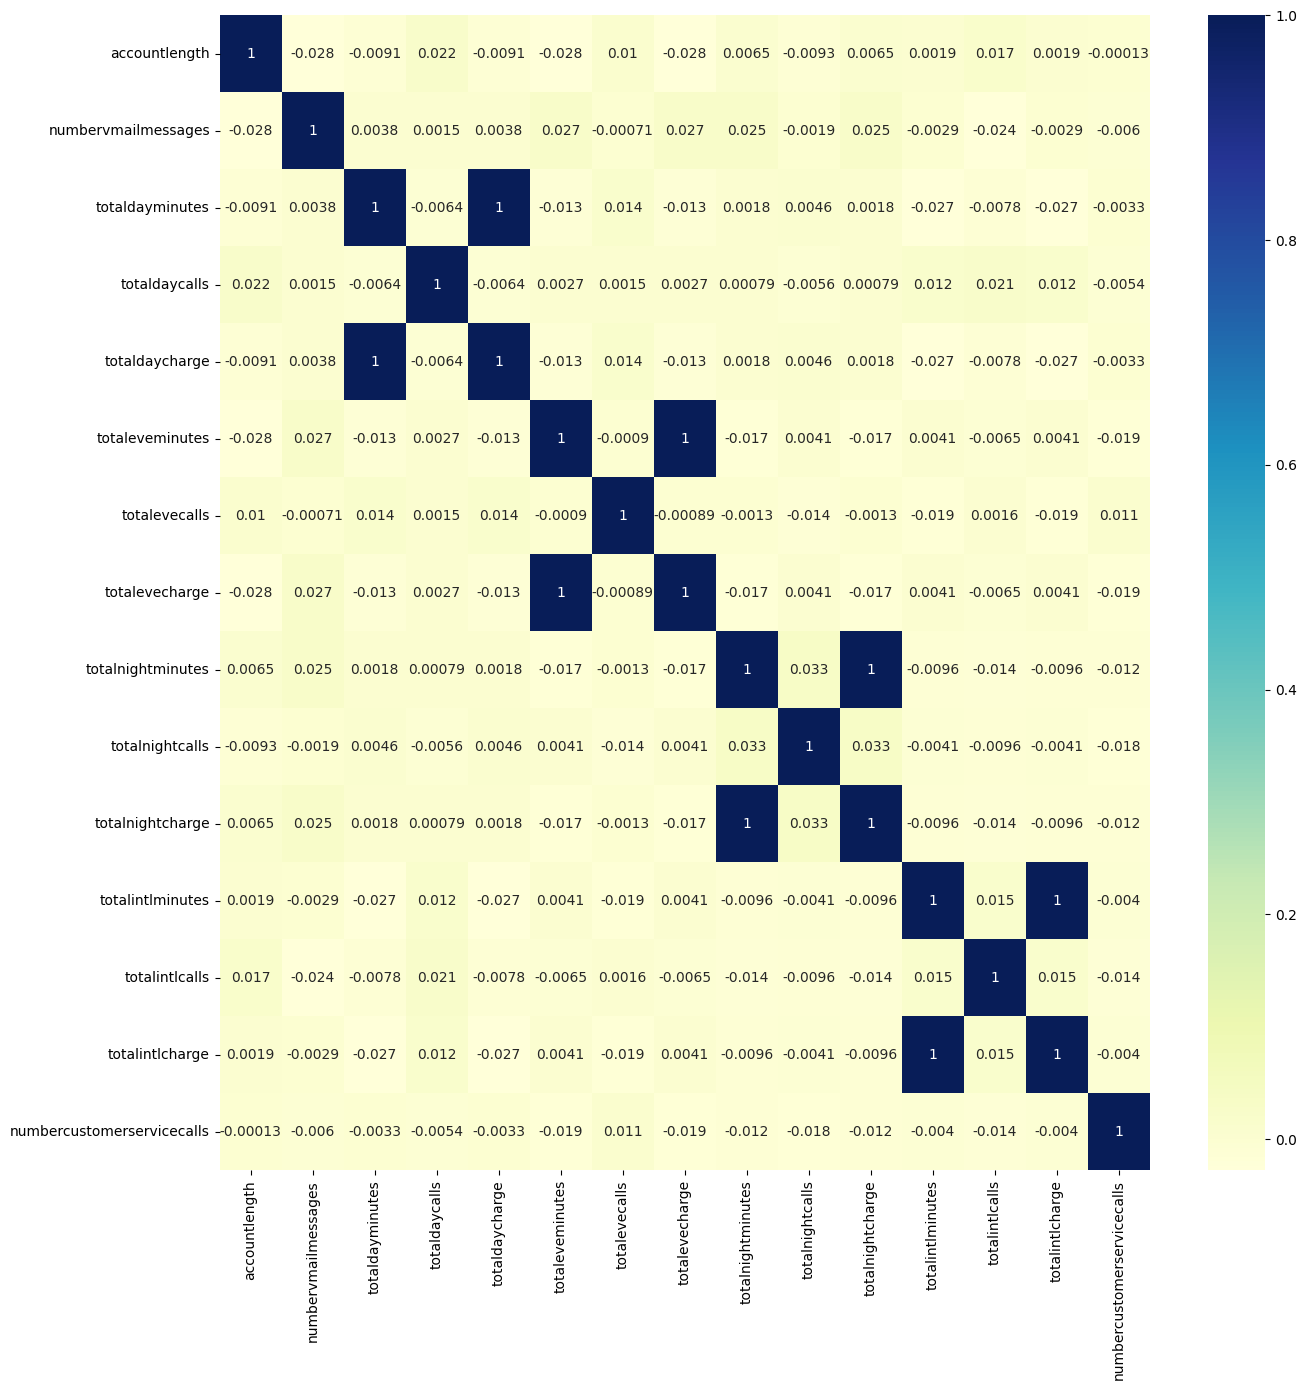

In [222]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.loc[:,quants].corr(),cmap='YlGnBu',annot=True)
plt.show()

## Fitting some initial models

In [193]:
x_train = df_train.drop(columns='churn',axis=1)
y_train = df_train['churn']

x_test = df_test.drop(columns='churn',axis=1)
y_test = df_test['churn']

In [194]:
df_train

churn  accountlength internationalplan voicemailplan  \
4373      0            119                no            no   
1823      0            116                no           yes   
966       1             48                no           yes   
367       0             45                no            no   
521       1             88                no            no   
...     ...            ...               ...           ...   
3922      0            173                no            no   
4414      0             50                no           yes   
1914      0             61                no           yes   
4357      0            124                no            no   
3711      0            127                no            no   

      numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
4373                    0            226.6            126           38.52   
1823                   23            253.0             78           43.01   
966                    22            152.0             63           25.84   
367                     0             78.2            127           13.29   
521                     0             73.3             86           12.46   
...                   ...              ...            ...             ...   
3922                    0            154.6             81           26.28   
4414                   39            147.3             75           25.04   
1914                   25            163.7             78           27.83   
4357                    0             94.8            102           16.12   
3711                    0            155.8             91           26.49   

      totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
4373            143.6            107           12.21               94.9   
1823            138.9            121           11.81              277.8   
966             258.8            131           22.00              263.2   
367             253.4            108           21.54              255.0   
521             161.4             82           13.72              239.6   
...               ...            ...             ...                ...   
3922            147.3            100           12.52              132.9   
4414            244.8             74           20.81              216.9   
1914            113.2            112            9.62              134.1   
4357            238.9             91           20.31              279.4   
3711            103.7             85            8.81              117.2   

      totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
4373              123              4.27              12.1               5   
1823              104             12.50              11.8               3   
966               109             11.84              15.7               5   
367               100             11.48              18.0               3   
521                76             10.78               8.2               3   
...               ...               ...               ...             ...   
3922               99              5.98               6.9               5   
4414              101              9.76              13.2               3   
1914              118              6.03               9.9               3   
4357               94             12.57              11.6               3   
3711              125              5.27               8.6               3   

      totalintlcharge  numbercustomerservicecalls  
4373             3.27                           1  
1823             3.19                           2  
966              4.24                           2  
367              4.86                           1  
521              2.21                           4  
...               ...                         ...  
3922             1.86                           0  
4414             3.56                           2  
1914             2.67                     

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

model = LogisticRegression(random_state=100)

categoricals = OneHotEncoder()
quantitatives = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),quants),
        ('cats',OneHotEncoder(),cats)
    ]
)

model_pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ('model',model)
]
)

In [196]:
cats=[]
quants=[]
for column in x_train.columns:
    if x_train[column].dtype=='object':
        cats.append(column)
    else:
        quants.append(column)

In [197]:
model = LogisticRegression(random_state=100)

categoricals = OneHotEncoder()
quantitatives = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),quants),
        ('cats',OneHotEncoder(),cats)
    ]
)

model_pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ('model',model)
]
)

In [199]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['accountlength',
                                                   'numbervmailmessages',
                                                   'totaldayminutes',
                                                   'totaldaycalls',
                                                   'totaldaycharge',
                                                   'totaleveminutes',
                                                   'totalevecalls',
                                                   'totalevecharge',
                                                   'totalnightminutes',
                                                   'totalnightcalls',
                                                   'totalnightcharge',
                                                   'totalintlminutes',
                                                   'totalintlcalls',
                                                   'totalintlcharge',
                                                   'numbercustomerservicecalls']),
                                                 ('cats', OneHotEncoder(),
                                                  ['internationalplan',
                                                   'voicemailplan'])])),
                ('model', LogisticRegression(random_state=100))])

In [205]:
from sklearn.metrics import accuracy_score
y_preds = model_pipeline.predict(x_test)
accuracy = accuracy_score(y_true=y_test,y_pred=y_preds)
print(accuracy)

0.866


In [208]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=100)
model_pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ('model',rf)
]
)
model_pipeline.fit(x_train,y_train)

y_preds_train = model_pipeline.predict(x_train)
y_preds_test = model_pipeline.predict(x_test)
accuracy_train = accuracy_score(y_true=y_train,y_pred=y_preds_train)
accuracy_test = accuracy_score(y_true=y_test,y_pred=y_preds_test)
print(accuracy_train)
print(accuracy_test)

1.0
0.953


In [209]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
rf = RandomForestClassifier(random_state=100)
model_pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ('model',xgb)
]
)
model_pipeline.fit(x_train,y_train)

y_preds_train = model_pipeline.predict(x_train)
y_preds_test = model_pipeline.predict(x_test)
accuracy_train = accuracy_score(y_true=y_train,y_pred=y_preds_train)
accuracy_test = accuracy_score(y_true=y_test,y_pred=y_preds_test)
print(accuracy_train)
print(accuracy_test)

1.0
0.954


In [210]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=100)
model_pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ('model',ada_boost)
]
)
model_pipeline.fit(x_train,y_train)

y_preds_train = model_pipeline.predict(x_train)
y_preds_test = model_pipeline.predict(x_test)
accuracy_train = accuracy_score(y_true=y_train,y_pred=y_preds_train)
accuracy_test = accuracy_score(y_true=y_test,y_pred=y_preds_test)
print(accuracy_train)
print(accuracy_test)

d:\University\4th Year\ST4035 - Data Science\University-Data-Science-ST4035-Projects\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.89625
0.878


In [211]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ('model',knn)
]
)
model_pipeline.fit(x_train,y_train)

y_preds_train = model_pipeline.predict(x_train)
y_preds_test = model_pipeline.predict(x_test)
accuracy_train = accuracy_score(y_true=y_train,y_pred=y_preds_train)
accuracy_test = accuracy_score(y_true=y_test,y_pred=y_preds_test)
print(accuracy_train)
print(accuracy_test)

0.91575
0.902
